In [141]:
import matplotlib.pyplot as plt
import numpy as np
import math
from numpy import array
from numpy.linalg import norm
n=20000
n1=10000
alpha_1=3.9
alpha_2=3.9
alpha_3=3.9
sigma_1=1
sigma_2=1
sigma_3=1
mu_1=0.001
mu_2=0.001
mu_3=0.001
gamma_1=0
gamma_2=0
g1=7
g2=7
x_rp=-1.5
betta_syn=0.0001
sigma_syn=1

def fun(x, y, z, a):
    if x <= 0:
        res=a/(1-x)+y
    elif (x<(a+y)) and (z<=0):
        res=a + y
    elif (x>=(a+y)) or (z>0):
        res=-1
    return res

def dfdx(x, y, z, a, xo1, xo2):
    yI=y+betta_syn*(g1*xi(xo1)*(x_rp-x)+g2*xi(xo2)*(x_rp-x))/2 #calculating y+I chemical
    if x <= 0:
        res=a/((1-x)*(1-x))-betta_syn*(g1*xi(xo1)+g2*(xi(xo2)))/2
    elif (x<(a+yI)) and (z<=0):
        res=-betta_syn*(g1*xi(xo1)+g2*(xi(xo2)))/2
    elif (x>=(a+yI)) or (z>0):
        res=0
    return res

def dfdy(x, y, z, a, xo1, xo2):
    yI=y+betta_syn*(g1*xi(xo1)*(x_rp-x)+g2*xi(xo2)*(x_rp-x))/2 #calculating y+I chemical
    if x <= 0:
        res=1
    elif (x<(a+yI)) and (z<=0):
        res=1
    elif (x>=(a+yI)) or (z>0):
        res=0
    return res

def xi(x):
    if(x>-0.8):
        a=1
    else:
        a=0
    return a

In [142]:
lyaps=[]
gpermas=[]
number=50 #number of experiments to calculate lyapunovs exponent
koef=number/10 #g1=g2 changes from 0 to 10
for gper in range(number):
    g1=gper/koef
    g2=gper/koef

    
    
    x1=[]
    y1=[]
    z1=[]
    x2=[]
    y2=[]
    z2=[]
    x3=[]
    y3=[]
    z3=[]
    I11=[]
    I12=[]
    I21=[]
    I22=[]
    I31=[]
    I32=[]
    T=[]

    for i in range(n):
        x1+=[0.0]
        y1+=[0.0]
        z1+=[0.0]
        x2+=[0.0]
        y2+=[0.0]
        z2+=[0.0]
        x3+=[0.0]
        y3+=[0.0]
        z3+=[0.0]
        I11+=[0.0]
        I12+=[0.0]
        I21+=[0.0]
        I22+=[0.0]
        I31+=[0.0]
        I32+=[0.0]
        T+=[i]

    if((g1>0)&(g2>0)):
        K1=2.0
        K2=2.0
        K3=2.0
    else:
        K1=1.0
        K2=1.0
        K3=1.0

    x1[0]=0
    y1[0]=0
    z1[0]=0

    x2[0]=0.5
    y2[0]=-1.5
    z2[0]=0

    x3[0]=-1
    y3[0]=-2.8
    z3[0]=0

    I11[0]=g1*(x_rp-x1[0])*xi(x3[0])
    I12[0]=g2*(x_rp-x1[0])*xi(x2[0])
    x1[1]=fun(x1[0], (y1[0]+betta_syn*(I11[0]+I12[0])/(K1)), z1[0], alpha_1)
    y1[1]=y1[0]+mu_1*(-x1[0]-1+sigma_1+sigma_syn*(I11[0]+I12[0])/(K1))
    z1[1]=x1[0]


    I21[0]=g1*(x_rp-x2[0])*xi(x1[0])
    I22[0]=g2*(x_rp-x2[0])*xi(x3[0])
    x2[1]=fun(x2[0], (y2[0]+betta_syn*(I21[0]+I22[0])/(K2)), z2[0], alpha_2)
    y2[1]=y2[0]+mu_1*(-x2[0]-1+sigma_2+sigma_syn*(I21[0]+I22[0])/(K2))
    z2[1]=x2[0]


    I31[0]=g1*(x_rp-x3[0])*xi(x2[0])
    I32[0]=g2*(x_rp-x3[0])*xi(x1[0])
    x3[1]=fun(x3[0], (y3[0]+betta_syn*(I31[0]+I32[0])/(K3)), z3[0], alpha_3)
    y3[1]=y3[0]+mu_1*(-x3[0]-1+sigma_3+sigma_syn*(I31[0]+I32[0])/(K3))
    z3[1]=x3[0]

    for i in range(n-1):
        if(i>0):
            I11[i]=g1*(x_rp-x1[i])*xi(x3[i])
            I12[i]=g2*(x_rp-x1[i])*xi(x2[i])
            x1[i+1]=fun(x1[i], (y1[i]+betta_syn*(I11[i]+I12[i])/(K1)), z1[i], alpha_1)
            y1[i+1]=y1[i]+mu_1*(-x1[i]-1+sigma_1+sigma_syn*(I11[i]+I12[i])/(K1))
            z1[i+1]=x1[i]


            I21[i]=g1*(x_rp-x2[i])*xi(x1[i])
            I22[i]=g2*(x_rp-x2[i])*xi(x3[i])
            x2[i+1]=fun(x2[i], (y2[i]+betta_syn*(I21[i]+I22[i])/(K2)), z2[i], alpha_2)
            y2[i+1]=y2[i]+mu_1*(-x2[i]-1+sigma_2+sigma_syn*(I21[i]+I22[i])/(K2))
            z2[i+1]=x2[i]


            I31[i]=g1*(x_rp-x3[i])*xi(x2[i])
            I32[i]=g2*(x_rp-x3[i])*xi(x1[i])
            x3[i+1]=fun(x3[i], (y3[i]+betta_syn*(I31[i]+I32[i])/(K3)), z3[i], alpha_3)
            y3[i+1]=y3[i]+mu_1*(-x3[i]-1+sigma_3+sigma_syn*(I31[i]+I32[i])/(K3))
            z3[i+1]=x3[i]

    x1=x1[n1:n]
    y1=y1[n1:n]
    z1=z1[n1:n]
    x2=x2[n1:n]
    y2=y2[n1:n]
    z2=z2[n1:n]
    x3=x3[n1:n]
    y3=y3[n1:n]
    z3=z3[n1:n]
    T=T[n1:n]

    N = n-n1
    M = 9
    m = [ [i]*M for i in range(N) ]
    for i in range(n-n1):
        m[i][0]=x1[i]
        m[i][1]=y1[i]
        m[i][2]=z1[i]
        m[i][3]=x2[i]
        m[i][4]=y2[i]
        m[i][5]=z2[i]
        m[i][6]=x3[i]
        m[i][7]=y3[i]
        m[i][8]=z3[i]

    W=np.eye(9)
    V=np.eye(9)
    J=np.zeros((9,9))
    #sum=[0,0,0,0,0,0,0,0,0]
    #lyap=[0,0,0,0,0,0,0,0,0]
    suma=lyap=0.0
    for k in range(1,(n-n1)):
        J[0][0]=dfdx(m[k][0], m[k][1], m[k][2], alpha_1, m[k][6], m[k][3])
        J[0][1]=dfdy(m[k][0], m[k][1], m[k][2], alpha_1, m[k][6], m[k][3])
        J[0][2]=0
        J[1][0]=mu_1*(-1-sigma_1/K1*(g1*xi(m[k][6])+g2*(xi(m[k][3]))))
        J[1][1]=1
        J[1][2]=0
        J[2][0]=1
        J[2][1]=0
        J[2][2]=0

        J[3][3]=dfdx(m[k][3], m[k][4], m[k][5], alpha_1, m[k][0], m[k][6])
        J[3][4]=dfdy(m[k][3], m[k][4], m[k][5], alpha_1, m[k][0], m[k][6])
        J[3][5]=0
        J[4][3]=mu_1*(-1-sigma_1/K1*(g1*xi(m[k][0])+g2*(xi(m[k][6]))))
        J[4][4]=1
        J[4][5]=0
        J[5][3]=1
        J[5][4]=0
        J[5][5]=0

        J[6][6]=dfdx(m[k][6], m[k][7], m[k][8], alpha_1, m[k][3], m[k][0])
        J[6][7]=dfdy(m[k][6], m[k][7], m[k][8], alpha_1, m[k][3], m[k][0])
        J[6][8]=0
        J[7][6]=mu_1*(-1-sigma_1/K1*(g1*xi(m[k][3])+g2*xi(m[k][0])))
        J[7][7]=1
        J[7][8]=0
        J[8][6]=1
        J[8][7]=0
        J[8][8]=0

        V[:, 1]=J.dot(W[:, 1])
        W[:, 1]=V[:, 1]/norm(V[:, 1])
        suma=suma+math.log(norm(V[:, 1]))
        lyap=suma/k

        #ka=0
        #for ka in range(9):
        #V[:,ka]=J.dot(W[:, ka])
        #if (norm(V[:,ka])!=0):
        #    W[:,ka]=V[:,ka]/norm(V[:,ka])
        #    sum[ka]+=math.log(norm(V[:,ka]))
        #    lyap[ka]=sum[ka]/k



    #lyap.sort()
    #print(lyap)
    lyaps+=[lyap]
    gpermas+=[gper/koef]
#print(lyap)


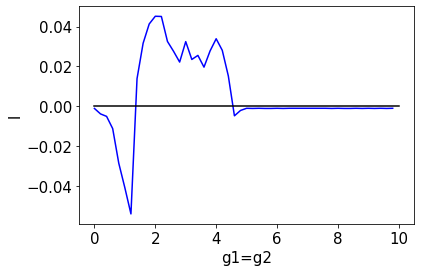

In [143]:
#fig, ax = plt.subplots(figsize = (8, 8))
plt.plot(gpermas, lyaps, color = 'blue')
plt.plot([0,3,5,10], [0,0,0,0], color = 'black')
plt.xlabel('g1=g2', fontsize=15)
plt.ylabel('l', fontsize=15)
plt.tick_params(labelsize=15)
plt.show()

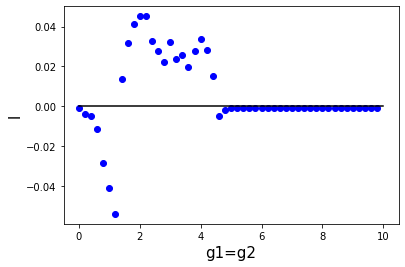

In [144]:
plt.plot(gpermas,lyaps,'bo')
plt.plot([0,3,5,10], [0,0,0,0], color = 'black')
plt.xlabel('g1=g2', fontsize=15)
plt.ylabel('l', fontsize=15)
plt.show()

In [145]:
print(lyaps)

[-0.0011385270194091916, -0.0038822278597772405, -0.00512743044534186, -0.011255093651816461, -0.028630126290892528, -0.040969957931339375, -0.05411207666162714, 0.013820639480888065, 0.0316048278976852, 0.041284757897157756, 0.045166819018426896, 0.04505140518428169, 0.03250676422317953, 0.02755862443757805, 0.022155881263358202, 0.032423959254586174, 0.023465136382860366, 0.025500706653314664, 0.019609223475812385, 0.027744780764977623, 0.033858460437658035, 0.028069835468958883, 0.015155763569363503, -0.004840059060755049, -0.002150249094835652, -0.0010621857692607276, -0.001138524036435683, -0.0010622257528743846, -0.0011386089292600705, -0.001138608925125241, -0.0010621857919737472, -0.0011385240652866115, -0.0010622257837463133, -0.0010622257875026037, -0.0010622257783998847, -0.0010621857817085332, -0.0010621858007053384, -0.001062185820906666, -0.0010622257856296718, -0.0011385240775212383, -0.0010622257890707818, -0.001138608947920543, -0.0011385240707640339, -0.00106218580697